In [ ]:
## Data Cleaning and Preparation

This section focuses on cleaning and preparing the datasets for analysis.
Proper data cleaning ensures accuracy, consistency, and reliability in the
insights derived from the data.


In [1]:
import pandas as pd

sales_df = pd.read_csv("../data/sales_data.csv")
customer_df = pd.read_csv("../data/customer_data.csv")

sales_df.head()


,Date,Product,Quantity,Price,Customer_ID,Region,Total_Sales
0,2024-01-01,Phone,7,37300,CUST001,East,261100
1,2024-01-02,Headphones,4,15406,CUST002,North,61624
2,2024-01-03,Phone,2,21746,CUST003,West,43492
3,2024-01-04,Headphones,1,30895,CUST004,East,30895
4,2024-01-05,Laptop,8,39835,CUST005,North,318680


In [2]:
sales_df['Date'] = pd.to_datetime(sales_df['Date'])
sales_df.head()


,Date,Product,Quantity,Price,Customer_ID,Region,Total_Sales
0,2024-01-01,Phone,7,37300,CUST001,East,261100
1,2024-01-02,Headphones,4,15406,CUST002,North,61624
2,2024-01-03,Phone,2,21746,CUST003,West,43492
3,2024-01-04,Headphones,1,30895,CUST004,East,30895
4,2024-01-05,Laptop,8,39835,CUST005,North,318680


In [3]:
sales_df['Year'] = sales_df['Date'].dt.year
sales_df['Month'] = sales_df['Date'].dt.month

sales_df[['Date', 'Year', 'Month']].head()


,Date,Year,Month
0,2024-01-01,2024,1
1,2024-01-02,2024,1
2,2024-01-03,2024,1
3,2024-01-04,2024,1
4,2024-01-05,2024,1


## Customer Analysis 
In this section, we identify customers who contribute the most to sales.

In [4]:
# Total sales by customer
customer_sales = sales_df.groupby("Customer_ID")["Total_Sales"].sum().sort_values(ascending=False)

customer_sales.head(10)


Customer_ID
CUST016    373932
CUST007    363870
CUST083    350888
CUST073    349510
CUST020    333992
CUST084    324144
CUST070    318762
CUST005    318680
CUST065    312564
CUST028    304465
Name: Total_Sales, dtype: int64

### Top Customers Insight

The table above shows customers ranked by their total purchase value.
A small number of customers contribute a large portion of overall sales.
These customers can be targeted for loyalty programs and personalized offers.


In [6]:
percentage = (top_5_total / overall_total) * 100
round(percentage, 2)



np.float64(14.33)

### Key Insight

The top 5 customers account for approximately **14.33%** of the total revenue.
This indicates that sales are distributed across a wide customer base rather
than being dominated by a small group of buyers.


In [7]:
monthly_sales = (
    sales_df
    .groupby(['Year', 'Month'])['Total_Sales']
    .sum()
    .reset_index()
)

monthly_sales


,Year,Month,Total_Sales
0,2024,1,4120524
1,2024,2,2656050
2,2024,3,4485006
3,2024,4,1103468


## Sales Pattern Analysis

This section analyzes sales trends over time by grouping total revenue
on a monthly basis. Understanding monthly performance helps identify
seasonal patterns and revenue fluctuations.


In [8]:
best_products = (
    sales_df
    .groupby('Product')['Total_Sales']
    .sum()
    .sort_values(ascending=False)
)

best_products


Product
Laptop        3889210
Tablet        2884340
Phone         2859394
Headphones    1384033
Monitor       1348071
Name: Total_Sales, dtype: int64

### Insight

The analysis shows that certain products consistently generate higher
revenue, indicating strong customer demand. These products should be
prioritized in marketing and inventory planning.


In [9]:
pivot_table = pd.pivot_table(
    sales_df,
    values='Total_Sales',
    index='Product',
    columns='Region',
    aggfunc='sum',
    fill_value=0
)

pivot_table


Region,East,North,South,West
Product,,,,
Headphones,288361,107091,512168,476413
Laptop,221946,1798206,1373120,495938
Monitor,642870,397100,39924,268177
Phone,506828,489284,1471428,391854
Tablet,859634,1191954,341212,491540


## Pivot Table Analysis

This pivot table summarizes total sales by product and region.
It helps compare regional performance and identify strong markets
for each product category.


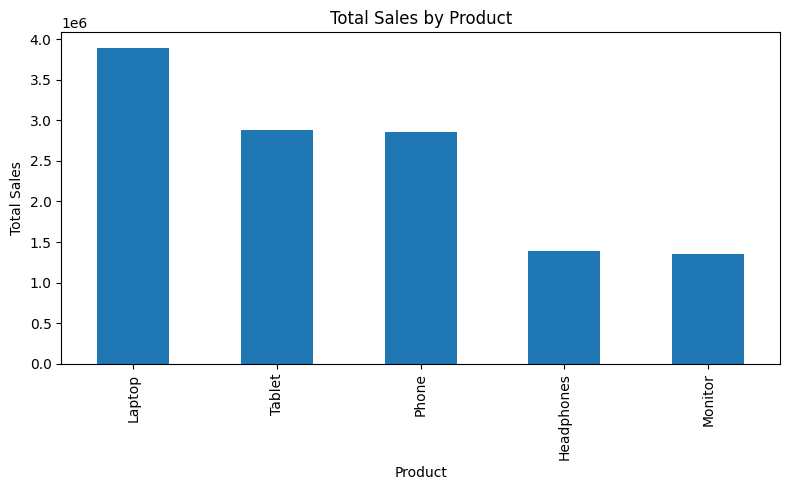

In [10]:
import matplotlib.pyplot as plt

product_sales = sales_df.groupby('Product')['Total_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
product_sales.plot(kind='bar')
plt.title('Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


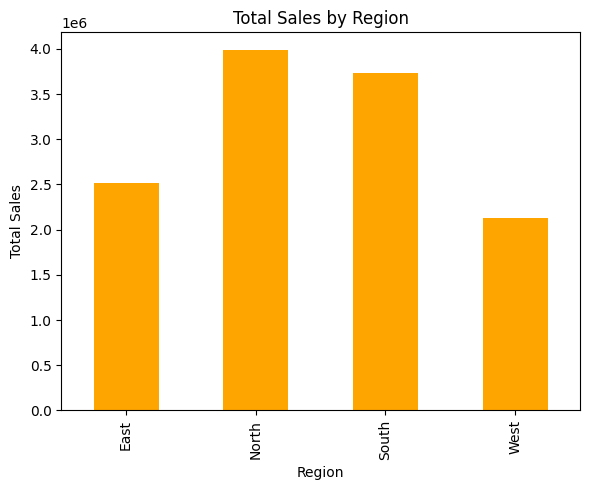

In [11]:
region_sales = sales_df.groupby('Region')['Total_Sales'].sum()

plt.figure(figsize=(6,5))
region_sales.plot(kind='bar', color='orange')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


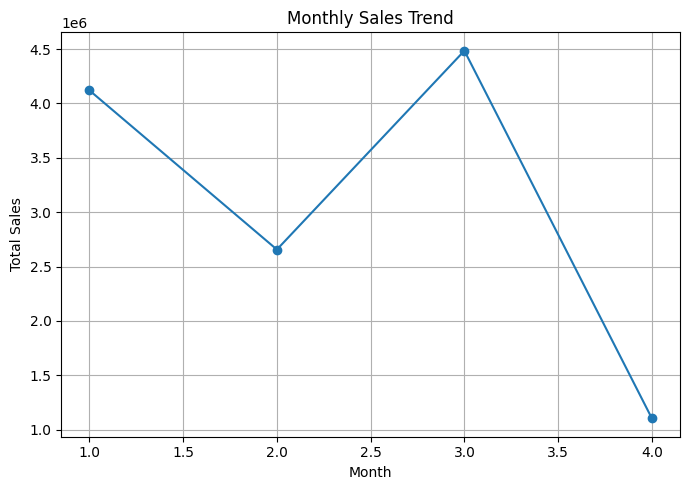

In [12]:
monthly_sales = sales_df.groupby('Month')['Total_Sales'].sum()

plt.figure(figsize=(7,5))
monthly_sales.plot(marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


## Visualization Insights

- Laptop sales dominate overall revenue, making it the most impactful product.
- Certain regions contribute more strongly to total sales, indicating market concentration.
- Monthly sales show a consistent trend, helping identify demand patterns over time.
